<a href="https://colab.research.google.com/github/Ela-Na/Ryerson-cind860/blob/main/Ela_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print("current working dir", os.getcwd())

import numpy as np
print("np", np.__version__)

import sys

import tensorflow as tf
print("tf", tf.__version__)
print("tf.keras", tf.keras.__version__)

import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib 

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image # Module with imagepreprocessing utilities

# keras functions through tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

current working dir /content
np 1.21.5
tf 2.8.0
tf.keras 2.8.0


In [ ]:
''' import shutil
shutil.unpack_archive("/content/drive/MyDrive/OCT2017.tar.gz", "/content/drive/MyDrive/OCT2017_2")'''

In [167]:
train_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/train'
train_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/NORMAL'
train_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/CNV'
train_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DRUSEN'
train_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DME'

In [168]:
validation_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/val'
val_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/NORMAL'
val_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/CNV'
val_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/DRUSEN'
val_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/val/DME'

In [169]:
test_dir = '/content/drive/MyDrive/OCT2017_2/OCT2017/test'
test_normal = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/NORMAL'
test_cnv = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/CNV'
test_drusen = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/DRUSEN'
test_dme = '/content/drive/MyDrive/OCT2017_2/OCT2017/test/DME'

In [170]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [171]:
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

val_generator1 = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

test_generator1 = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=150,
    class_mode='binary')

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [172]:
for data_batch, labels_batch in train_generator1:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (150, 150, 150, 3)
labels batch shape: (150,)


In [ ]:
sample_training_images, _ = next(train_generator1)


# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(10, 10, figsize=(100,100))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:100])

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(10, 15, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

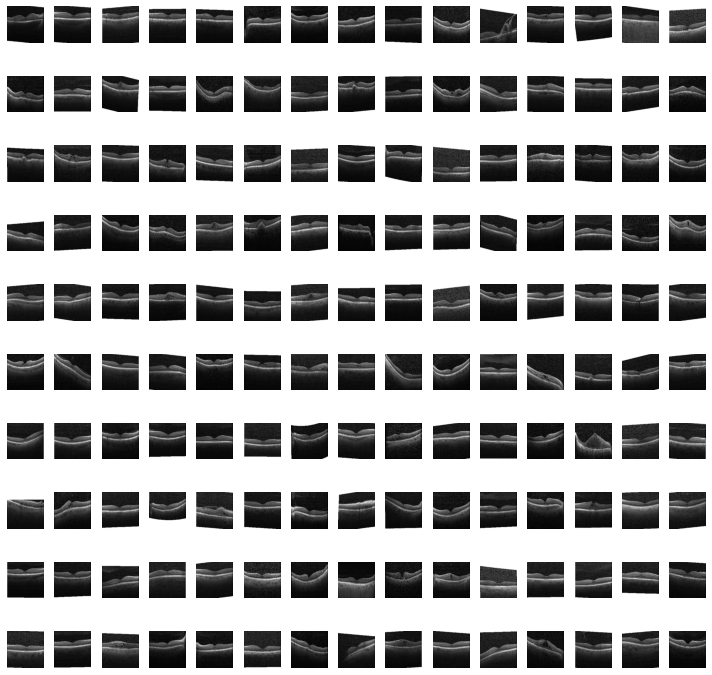

In [ ]:
images_tg = train_generator1[0][0]
images_arr = np.array(images_tg)
plotImages(images_arr)

In [ ]:
!pip install -q easyimages

     |████████████████████████████████| 88 kB 3.7 MB/s 


In [ ]:
!pip install -q basic-image-eda


In [ ]:
# latest version
# pip install git+https://github.com/Soongja/basic-image-eda



found 26315 images.
Using 2 threads. (max:2)



100%|██████████| 26315/26315 [06:18<00:00, 69.51it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  26315

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  512
mean height                              |  500.1326999809994
median height                            |  496

min width                                |  384
max width                                |  1536
mean width                               |  659.6706061181835
median width                             |  512

mean height/width ratio                  |  0.7581551994926965
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [504 656] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 656] (h x w, multiples of 16)
recommended input si

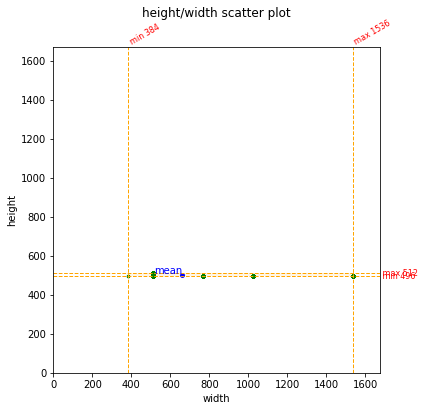

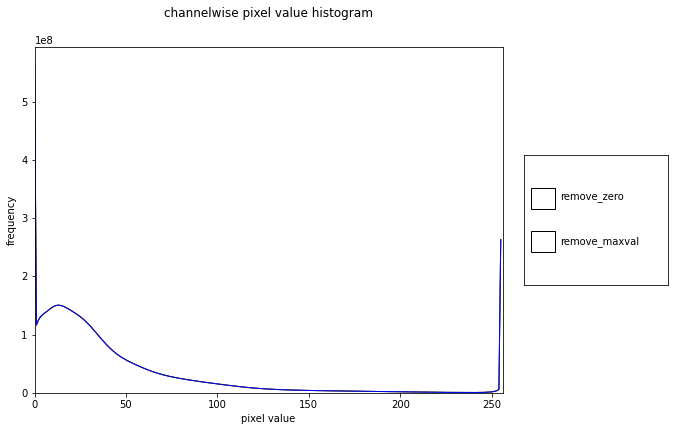


found 37205 images.
Using 2 threads. (max:2)



100%|██████████| 37205/37205 [09:26<00:00, 65.69it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  37205

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  496
mean height                              |  496.0
median height                            |  496

min width                                |  384
max width                                |  1536
mean width                               |  736.3724230614165
median width                             |  512

mean height/width ratio                  |  0.6735722094778005
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [496 736] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 736] (h x w, multiples of 16)
recommended input size(by mean) 

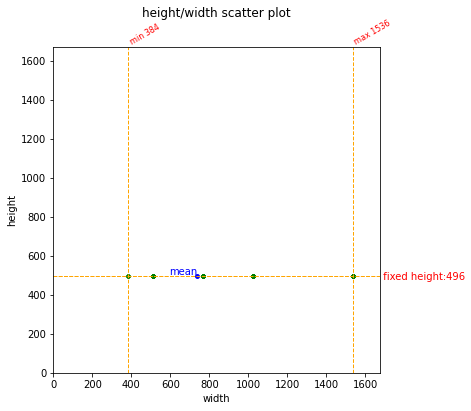

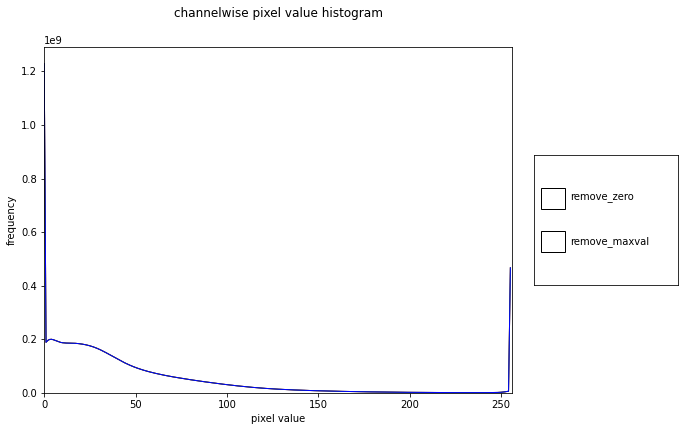


found 11348 images.
Using 2 threads. (max:2)



100%|██████████| 11348/11348 [02:32<00:00, 74.45it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  11348

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  512
mean height                              |  508.20867113147693
median height                            |  512

min width                                |  512
max width                                |  1536
mean width                               |  564.7881565033487
median width                             |  512

mean height/width ratio                  |  0.8998217566703945
median height/width ratio                |  1.0
recommended input size(by mean)          |  [512 568] (h x w, multiples of 8)
recommended input size(by mean)          |  [512 560] (h x w, multiples of 16)
recommended input size(

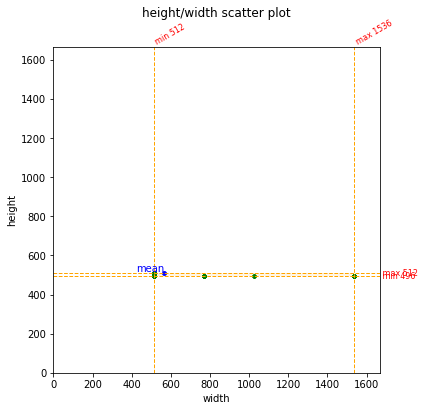

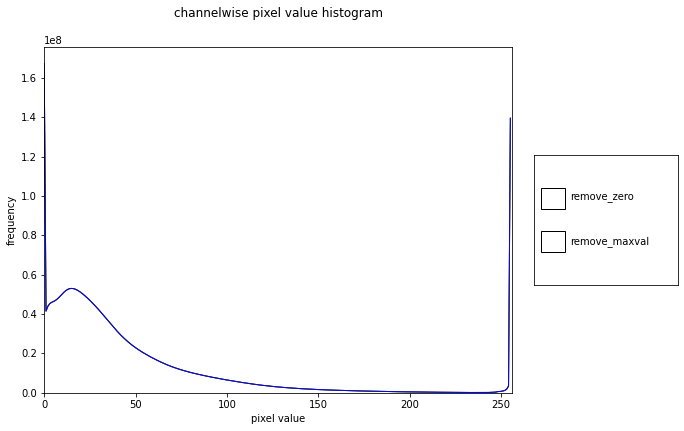


found 8616 images.
Using 2 threads. (max:2)



100%|██████████| 8616/8616 [01:53<00:00, 76.02it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  8616

dtype                                    |  uint8
channels                                 |  [1]
extensions                               |  ['jpeg']

min height                               |  496
max height                               |  496
mean height                              |  496.0
median height                            |  496

min width                                |  512
max width                                |  1536
mean width                               |  670.6926648096564
median width                             |  512

mean height/width ratio                  |  0.7395339564966996
median height/width ratio                |  0.96875
recommended input size(by mean)          |  [496 672] (h x w, multiples of 8)
recommended input size(by mean)          |  [496 672] (h x w, multiples of 16)
recommended input size(by mean)  

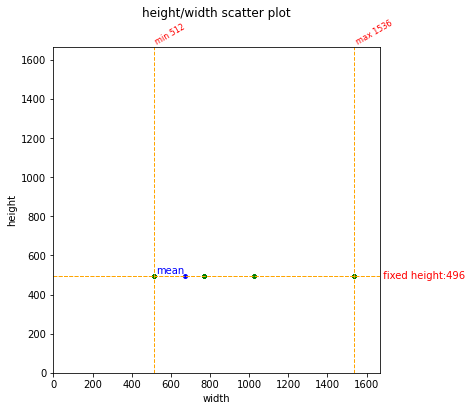

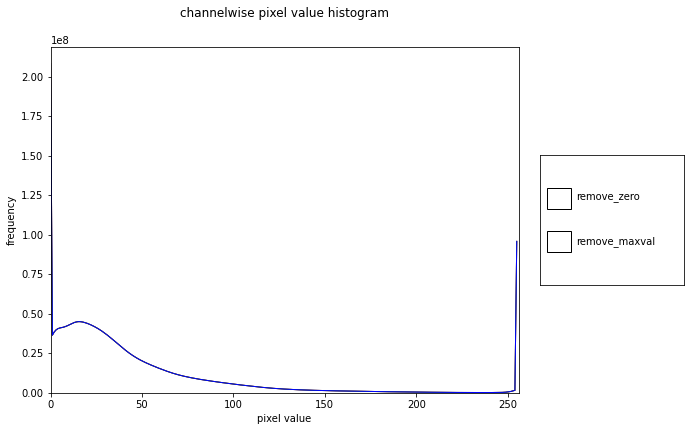

In [ ]:
from basic_image_eda import BasicImageEDA


data_dir1 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/NORMAL/'
data_dir2 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/CNV/'
data_dir3 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DME/'
data_dir4 = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/DRUSEN/'

dirs = [data_dir1, data_dir2, data_dir3, data_dir4]
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

for dir in dirs:

  BasicImageEDA.explore(dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [ ]:
# to check whether there is corrupted images in the dataset

In [ ]:
import easyimages
from easyimages import EasyImageList
img_list = EasyImageList.from_folder('/content/drive/MyDrive/OCT2017_2/OCT2017/train/DME/')
img_list.symlink_images()
img_list.html(sample=500, size=50)
img_list


<ImageList with 11348 EasyImages [filter OFF]>

In [ ]:
!pip install -q pandas-profiling
#!pip install -U -q pandas-profiling


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
import pandas_profiling as pdpf

In [ ]:
import os
import pandas as pd

BASE_DIR = '/content/drive/MyDrive/OCT2017_2/OCT2017/train/'
train_cnv = BASE_DIR+'CNV/'
train_dme = BASE_DIR+'DME/'
train_normal = BASE_DIR+'NORMAL/'
train_drusen = BASE_DIR+'DRUSEN/'

images_cnv = sorted(os.listdir(train_cnv))
images_dme = sorted(os.listdir(train_dme))
images_drusen = sorted(os.listdir(train_drusen))
images_normal = sorted(os.listdir(train_normal))

images1=[i for i in images_cnv]
images2=[i for i in images_dme]
images3=[i for i in images_drusen]
images4=[i for i in images_normal]

train_images = [images1, images2, images3, images4]

length = []
max_l = 0

for l in train_images:
  length.append(len(l))

for l in length:
  if l > length[0]:
    max_l = l
  else:
    max_l = length[0]


df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df1['cnv']=[train_cnv+str(x) for x in images1]
df2['dme']=[train_dme+str(x) for x in images2]
df3['drusen']=[train_drusen+str(x) for x in images3]
df4['normal']=[train_normal+str(x) for x in images4]

'''
for n in range(len(df1), max_l):
  df1['cnv'].append("NaN")

for n in range(len(df2), max_l):
  df2['dme'].append("NaN")

for n in range(len(df3), max_l):
  df3['drusen'].append("NaN")

for n in range(len(df4), max_l):
  df4['normal'].append("NaN")
'''
df = pd.DataFrame()

df = pd.concat([df1, df2, df3, df4], axis=1, join='outer', ignore_index = True)


#df['oct'] = [train_cnv+str(x) for x in images1]
#df['label'] = ['cnv' for 'cnv' in range(len(images1))]
cnv_df = df.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_train.csv', index =False, header=None)
'''
dme_df = df2.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_dme.csv', index =False, header=None)
drusen = df3.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_drusen.csv', index =False, header=None)
normal_df = df4.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_normal.csv', index =False, header=None)'''

"\ndme_df = df2.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_dme.csv', index =False, header=None)\ndrusen = df3.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_drusen.csv', index =False, header=None)\nnormal_df = df4.to_csv('/content/drive/MyDrive/OCT2017_2/OCT2017/train/oct_normal.csv', index =False, header=None)"

In [ ]:
max_l
length


[37205, 11348, 8616, 26315]

In [ ]:
from pandas_profiling import ProfileReport


In [ ]:
profile = pdpf.ProfileReport(df)
print(profile)


In [ ]:
df.profile_report(style={'full_width':True})


ValidationError: ignored

In [ ]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file='OCT.pdf')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [ ]:
profile2 = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile2.to_file("oct2.pdf")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:263: UserWarning: Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  f"Extension {suffix} not supported. For now we assume .html was intended. "


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile2

# Feature Selection

## 1- Feature Selection Machine Learning

## Feature Selection using SVM

In [ ]:
import sys


In [217]:
from sklearn.svm import SVC
clf = models.append(('SVM', SVC(random_state=9)))
prediction= clf.fit(ptest_data.reshape(1,-1))

AttributeError: ignored

## Feature Selection using PCA

In [ ]:
# Installing the opencv-python library
!pip install opencv-python


In [ ]:
# Importing the cv2 module
import cv2

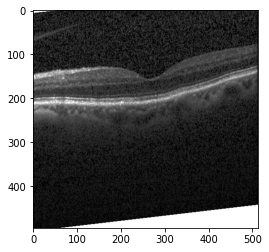

In [ ]:
import imageio


img = imageio.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg')
img.shape  # im is a numpy array


img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')



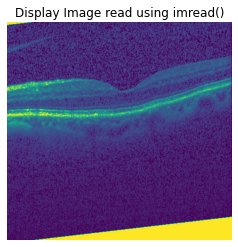

In [ ]:
img_array=plt.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg') 
plt.imshow(img_array)
plt.title('Display Image read using imread()') 
plt.axis('off')
plt.show()

In [182]:
np.array(test_generator1[0][1]).shape

(150,)

In [183]:
import math

n = 150
#number_of_examples = len(test_batches.filenames)
number_generator = math.ceil(1000 / (1.0 * n)) 
# 1.0 above is to skip integer division

ptest_label = []
ptest_data = []

for i in range(0,int(number_generator)):
    ptest_label.extend(np.array(test_generator1[i][1]))
    ptest_data.extend(np.array(test_generator1[i][0]))


In [193]:
ptest_label = np.array(ptest_label)
ptest_data = np.array(ptest_data)

In [194]:
ptest_label.shape

(1000,)

In [197]:
ptest_data.shape

(1000, 67500)

In [196]:
ptest_data = ptest_data.reshape([1000, 67500])

In [199]:
np.array(val_generator1[0][0]).shape

(32, 150, 150, 3)

In [206]:
pval_label1 = []
pval_data1 = []

pval_label1.extend(np.array(val_generator1[0][1]))
pval_data1.extend(np.array(val_generator1[0][0]))

In [207]:
pval_label = np.array(pval_label1)
pval_data = np.array(pval_data1)

In [208]:
pval_label.shape

(32,)

In [209]:
pval_data.shape

(32, 150, 150, 3)

In [210]:
pval_data = pval_data.reshape (32, 67500)

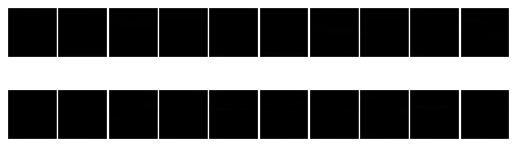

In [215]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
normal_pca = PCA(n_components=0.8)
normal_pca.fit(ptest_data)
fig, axes = plt.subplots(2,10,figsize=(9,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
  ax.imshow(normal_pca.components_[i].reshape(150,150, 3),cmap="gray")


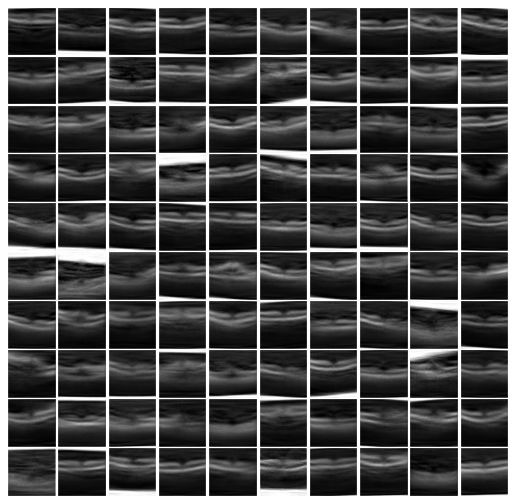

In [214]:
components = normal_pca.transform(ptest_data)
projected = normal_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(150, 150, 3),cmap="gray")


## Feature selection  HOG

In [ ]:
!pip install -q scikit-image

In [ ]:
import skimage

(496, 512)


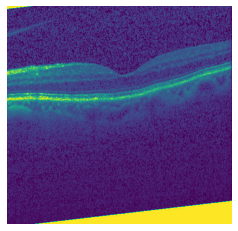

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.util import crop


# reading the image
img = imageio.imread('/content/drive/MyDrive/train/NORMAL/NORMAL-1001666-1.jpeg')
plt.axis("off")
plt.imshow(img)
print(img.shape)


(500, 600)


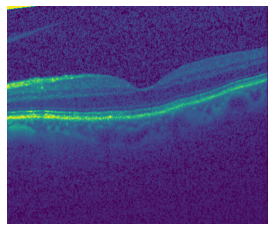

In [ ]:
resized_img = resize(img, (150*4, 150*4))
resized_img = crop(resized_img, ((0,100), (0, 0)))
#resized_img = resized_img.astype(np.uint8)
#gray_img = resized_img/255
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

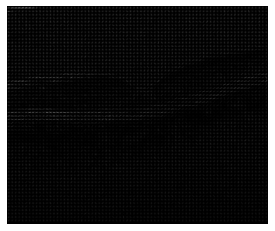

In [ ]:
fd, hog_image = hog(resized_img,  orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")


In [ ]:
fd.shape

(162504,)

In [ ]:
plt.imsave("resized_img.jpg", resized_img)
plt.imsave("hog_image.jpg", hog_image, cmap="gray")


In [ ]:
from skimage import color, data
from skimage.restoration import denoise_wavelet, calibrate_denoiser
import numpy as np
#skimage.restoration.calibrate_denoiser()
resized_img =  color.rgb2gray(resized_img[:50, :50])
rng = np.random.default_rng()
noisy = img + 0.5 * resized_img.std() * rng.standard_normal(resized_img.shape)
parameters = {'sigma': np.arange(0.1, 0.4, 0.02)}
denoising_function = calibrate_denoiser(noisy, denoise_wavelet,denoise_parameters=parameters)
denoised_img = denoising_function(resized_img)

plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: ignored

In [ ]:
from skimage import feature
from imutils import paths
import argparse

In [ ]:
# loop over the test dataset
for (i, imagePath) in enumerate(paths.list_images(args["test"])):
	# load the test image, convert it to grayscale, and resize it to
	# the canonical size
	image = cv2.imread(imagePath)
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	logo = cv2.resize(gray, (200, 100))

	# extract Histogram of Oriented Gradients from the test image and
	# predict the make of the car
	(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(10, 10),cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1", visualize=True)
	pred = model.predict(H.reshape(1, -1))[0]

	# visualize the HOG image
	hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
	hogImage = hogImage.astype("uint8")
	cv2.imshow("HOG Image #{}".format(i + 1), hogImage)

	# draw the prediction on the test image and display it
	cv2.putText(image, pred.title(), (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0,
		(0, 255, 0), 3)
	cv2.imshow("Test Image #{}".format(i + 1), image)
	cv2.waitKey(0)

## 2- Feature Selection Deep Learning

## a-Feature Selection Using CNN

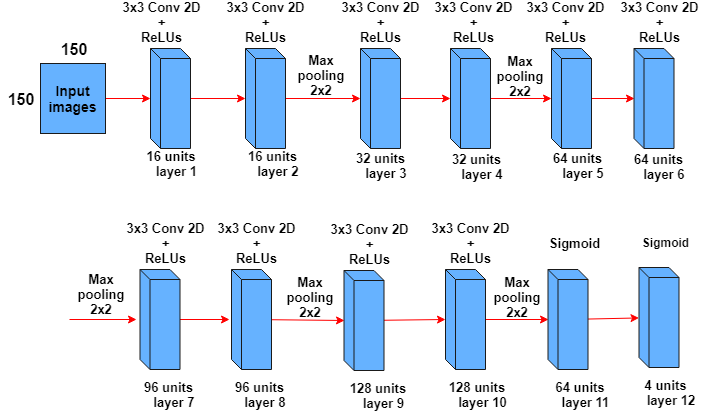

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.optimizers import SGD

In [6]:
kcnn = Sequential()
kcnn.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
kcnn.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(96, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(96, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
kcnn.add(MaxPooling2D((2, 2)))
kcnn.add(Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Conv2D(4, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
kcnn.add(Dropout(0.2))


In [7]:
kcnn.add(Flatten())
kcnn.add(Dense(4, activation='relu', kernel_initializer='he_uniform'))
kcnn.add(Dense(4, activation='softmax'))

In [8]:
kcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [9]:
def Kermany2018(batch_size,image_size,data_dir):

    '''
    Publication : https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
    Dataset : https://data.mendeley.com/datasets/rscbjbr9sj/3
    '''
    #train_size = 83484
    #test_size = 1000

    


    train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    val_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    train_path = data_dir+'/train'
    val_path = data_dir+'/val'
    test_path = data_dir+'/test'

    classes = ['CNV', 'DME','DRUSEN','NORMAL']

    train_batches = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    val_batches = val_datagen.flow_from_directory(val_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    test_batches = test_datagen.flow_from_directory(test_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size, class_mode='categorical')

    return train_batches, val_batches, test_batches

In [10]:
train_batches, val_batches, test_batches = Kermany2018(250, 150, '/content/drive/MyDrive/OCT2017_2/OCT2017/')


Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [11]:
num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 1
val_size = 32

In [12]:
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
kcnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = kcnn.fit(test_batches, shuffle=False, steps_per_epoch=(test_size//batch_size), validation_data=val_batches, validation_steps= (val_size//2), epochs=epoch, verbose=1)


4/4 [==============================] - 357s 113s/step - loss: 1.4068 - accuracy: 0.2670 - val_loss: 1.3911 - val_accuracy: 0.2500


In [14]:
kcnn.layers[19]._name='dense1'
print(kcnn.layers[19].name)

dense1


In [15]:
from keras.models import Model

layer_name = 'dense1'
kcnn_dense = Model(inputs=kcnn.input, outputs=kcnn.get_layer(layer_name).output)
dense_output = kcnn_dense.predict(test_batches)

In [20]:
kcnn_feat = kcnn.get_layer('dense1')

#feat_train = kcnn_feat.predict(train_batches)
#print(feat_train.shape)

feat_val = kcnn_feat.predict(val_batches)
print(feat_val.shape)

feat_test = kcnn_feat.predict(test_batches)
print(feat_test.shape)

AttributeError: ignored

In [17]:
kcnn_f = tf.data.Dataset.from_tensors(dense_output)
iterator = iter(kcnn_f)
print(iterator.get_next())


tf.Tensor(
[[0.21754402 0.         0.         0.        ]
 [0.1829164  0.         0.         0.        ]
 [0.24279435 0.         0.         0.        ]
 ...
 [0.16106306 0.         0.         0.        ]
 [0.19901392 0.         0.         0.        ]
 [0.21016212 0.         0.         0.        ]], shape=(1000, 4), dtype=float32)


In [166]:
kcnnf = tf.reshape(kcnn_f, [1000])

ValueError: ignored

In [18]:
!pip install -q tensorflow_decision_forests

     |████████████████████████████████| 13.4 MB 3.8 MB/s 
     |████████████████████████████████| 462 kB 50.7 MB/s 


In [19]:
import tensorflow_decision_forests as tfdf

kcnnforest = tfdf.keras.RandomForestModel()
kcnnforest.compile(metrics=["accuracy"])
kcnnforest.fit(kcnn_f)

print(krforest.summary())

Use /tmp/tmpwcn7i6n_ as temporary training directory
Starting reading the dataset


ValueError: ignored

In [119]:
import math

n = batch_size
#number_of_examples = len(test_batches.filenames)
number_generator = math.ceil(1000 / (1.0 * n)) 
# 1.0 above is to skip integer division

test_label1 = []
test_data1 = []

for i in range(0,int(number_generator)):
    test_label1.extend(np.array(test_batches[i][1]))
    test_data1.extend(np.array(test_batches[i][0]))


In [120]:
test_label = []
for i in range(1000):
  for j in range(4):
    if test_label1[i][j] != 0:
      test_label.append(j+1)
    

In [121]:
test_label = np.array(test_label)
test_data = np.array(test_data1)

In [122]:
test_label.shape

(1000,)

In [123]:
test_data = np.reshape(test_data1, (1000, 67500))

In [124]:
test_data.shape

(1000, 67500)

In [125]:
np.array(val_batches[0][1]).shape

(32, 4)

In [143]:
val_label1 = []
val_data1 = []

val_label1.extend(np.array(val_batches[0][1]))
val_data1.extend(np.array(val_batches[0][0]))

In [147]:
val_label = []

for i in range(32):
  for j in range(4):
    if val_label1[i][j] != 0:
      val_label.append(j+1)
    

In [148]:
val_label = np.array(val_label)
val_data = np.array(val_data1)

In [149]:
val_label.shape

(32,)

In [150]:
val_data.shape

(32, 150, 150, 3)

In [151]:
val_data = val_data.reshape (32, 67500)

In [105]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(test_data, test_label)
#gboost.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

In [ ]:
from sklearn import cross_validation

cv = cross_validation.KFold(len(train), n_folds=5)

In [155]:
val_pred = rforest.predict(val_data)

In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(val_label, val_pred)


0.4375

In [158]:
confusion_matrix(val_label, val_pred)


array([[7, 1, 0, 0],
       [4, 3, 0, 1],
       [5, 0, 1, 2],
       [2, 2, 1, 3]])

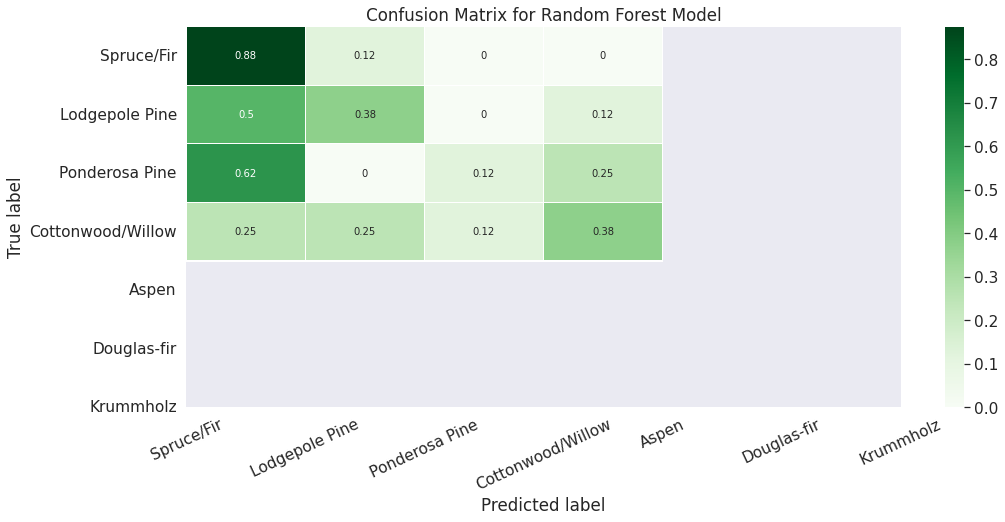

In [160]:
import seaborn as sns

# Get and reshape confusion matrix data
matrix = confusion_matrix(val_label, val_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [162]:
print(classification_report(val_label, val_pred))


              precision    recall  f1-score   support

           1       0.39      0.88      0.54         8
           2       0.50      0.38      0.43         8
           3       0.50      0.12      0.20         8
           4       0.50      0.38      0.43         8

    accuracy                           0.44        32
   macro avg       0.47      0.44      0.40        32
weighted avg       0.47      0.44      0.40        32



## b-Feature Selection Using Pretrained CNN 

b1- Feature Selection Using VGGNet

In [ ]:

from keras.applications.vgg16 import VGG16
vgg_16 = VGG16()

In [ ]:
from keras.models import load_model
load_model('Downloads/vgg16_weights_860.h5')

OSError: ignored

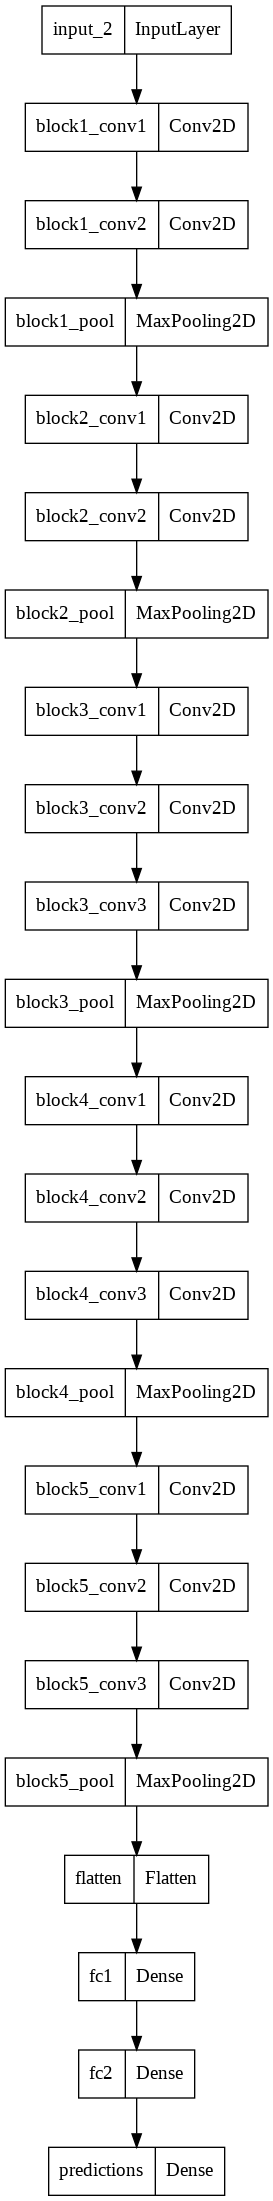

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(vgg_16, to_file='vgg.png')

In [ ]:
# load the model

print(vgg_16.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def Kermany2018(batch_size,image_size,data_dir):

    '''
    Publication : https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
    Dataset : https://data.mendeley.com/datasets/rscbjbr9sj/3
    '''
    #train_size = 83484
    #test_size = 1000

    


    train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    val_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    train_path = data_dir+'/train'
    val_path = data_dir+'/val'
    test_path = data_dir+'/test'

    classes = ['CNV', 'DME','DRUSEN','NORMAL']

    train_batches = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    val_batches = val_datagen.flow_from_directory(val_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    test_batches = test_datagen.flow_from_directory(test_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size, class_mode='categorical')

    return train_batches, val_batches, test_batches

In [ ]:
train_batches, val_batches, test_batches = Kermany2018(224, 224, '/content/drive/MyDrive/OCT2017_2/OCT2017/')

num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 10



Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')
 

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = vgg16_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [ ]:
train_features, train_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_features, validation_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_features, test_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (32, 7 * 7 * 512))
test_features = np.reshape(test_features, (500, 7 * 7 * 512))

In [ ]:
vgg16_pretrained = models.Sequential()

vgg16_pretrained.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
vgg16_pretrained.add(layers.Dropout(0.5))
vgg16_pretrained.add(layers.Dense(1, activation='sigmoid'))

vgg16_pretrained.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy',
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history_pretrained = vgg16_pretrained.fit(train_features, 
                                          train_labels, 
                                          epochs=10, 
                                          batch_size=224, 
                                          validation_data=(validation_features, validation_labels))

Epoch 1/10
9/9 [==============================] - 3s 53ms/step - loss: -4.3810 - acc: 0.1970 - val_loss: -5.3454 - val_acc: 0.2500
Epoch 2/10
9/9 [==============================] - 0s 31ms/step - loss: -10.5366 - acc: 0.1975 - val_loss: -8.3825 - val_acc: 0.2500
Epoch 3/10
9/9 [==============================] - 0s 30ms/step - loss: -15.0549 - acc: 0.1975 - val_loss: -11.0945 - val_acc: 0.2500
Epoch 4/10
9/9 [==============================] - 0s 30ms/step - loss: -19.1916 - acc: 0.1975 - val_loss: -13.6857 - val_acc: 0.2500
Epoch 5/10
9/9 [==============================] - 0s 29ms/step - loss: -23.3426 - acc: 0.1975 - val_loss: -16.2801 - val_acc: 0.2500
Epoch 6/10
9/9 [==============================] - 0s 30ms/step - loss: -27.3855 - acc: 0.1975 - val_loss: -18.8837 - val_acc: 0.2500
Epoch 7/10
9/9 [==============================] - 0s 28ms/step - loss: -31.2367 - acc: 0.1975 - val_loss: -21.5374 - val_acc: 0.2500
Epoch 8/10
9/9 [==============================] - 0s 29ms/step - loss: -

In [ ]:
best_epoch_model = np.argmin(history_pretrained.history['val_loss'])
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model,
                                                                 history_pretrained.history['val_loss'][best_epoch_model], history_pretrained.history['val_acc'][best_epoch_model]))

best epoch:9 validation loss:-29.496 validation acc:0.250


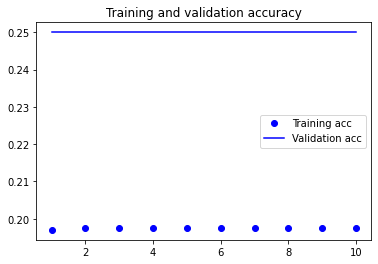

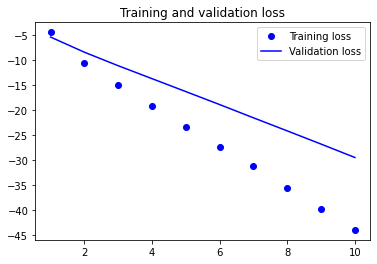

In [ ]:
acc = history_pretrained.history['acc']
val_acc = history_pretrained.history['val_acc']
loss = history_pretrained.history['loss']
val_loss = history_pretrained.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
input_shape = (224, 224, 3)

    
for layer in vgg16_base.layers[:15]:
    layer.trainable = False

for layer in vgg16_base.layers[15:]:
    layer.trainable = True

In [ ]:
last_layer = vgg16_base.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

vgg16_fineTuning = models.Model(vgg16_base.input, x)

vgg16_fineTuning.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

vgg16_fineTuning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# fine-tune the model
history_fineTuning = vgg16_fineTuning.fit_generator(
    train_features,
    epochs=10,
    validation_data=validation_features)

# history_fineTuning = model_fineTuning.fit_generator(
#     train_generator,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=total_validate//batch_size,
#     steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


ValueError: ignored

In [ ]:
best_epoch_model = np.argmin(history_fineTuning.history['val_loss'])
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model,
                                                                 history_fineTuning.history['val_loss'][best_epoch_model], history_fineTuning.history['val_accuracy'][best_epoch_model]))

In [ ]:
acc = history_fineTuning.history['accuracy']
val_acc = history_fineTuning.history['val_accuracy']
loss = history_fineTuning.history['loss']
val_loss = history_fineTuning.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# evaluate on the test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = vgg16_fineTuning.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

In [ ]:
for data_batch, _ in train_generator2:
  for img in data_batch:
    img = img_to_array(img)
    img = img.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    img = preprocess_input(img)
    break

In [ ]:

from keras.preprocessing.image import load_img
# load an image from file

image = load_img('mug.jpg', target_size=(224, 224, 3))

In [ ]:

from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
train_generator2 = img_to_array(train_generator2)

In [ ]:
# reshape data for the model


In [ ]:

from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model


TypeError: ignored

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

print('%s (%.2f%%)' % (label[1], label[2]*100))

In [ ]:
from keras.applications.vgg16 import VGG16
model = VGG16()


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img = image.load_img('my_image', target_size=(224, 224))
img = image.img_to_array(img)
img = preprocess_put(img)

x = np.expand_dims(img, 0)

y = vgg.predict(x)
np.argmax(y) # always end up at id 8 (which is file folder)

b2- Feature Selection Using ResNet

In [ ]:
#from tf.keras.applications.resnet50 import ResNet50
# load model
resnet_50 = tf.keras.applications.resnet50.ResNet50()
# summarize the model
resnet_50.summary()

102981632/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
resnet50_base = tf.keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))
resnet50_base.summary()

94781440/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

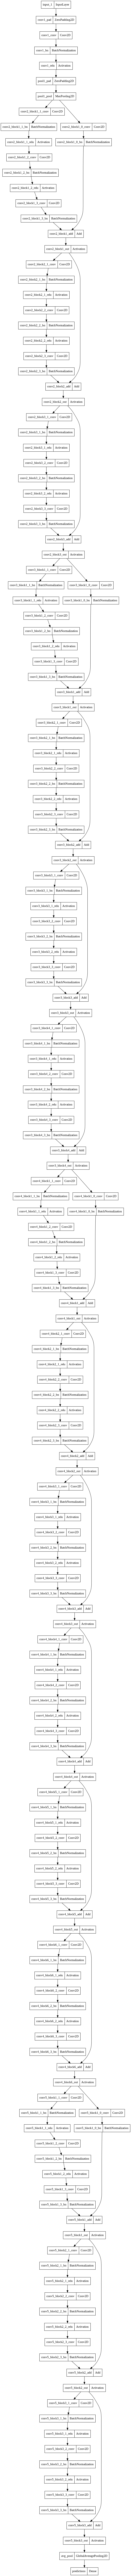

In [ ]:
plot_model(resnet_50, to_file='resnet.png')

In [ ]:
def extract_features(directory, sample_count):
  
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count))

  datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
  
  generator = datagen.flow_from_directory(
      directory,
      target_size=(224, 224),
      batch_size=batch_size,
      class_mode='binary')

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = resnet50_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
  
    i += 1
    if i * batch_size >= sample_count:
      break
  
  return features, labels

In [ ]:
train_features, train_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/train', 2000)
validation_features, validation_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/val', 32)
test_features, test_labels = extract_features('/content/drive/MyDrive/OCT2017_2/OCT2017/test', 500)

Found 8253 images belonging to 4 classes.


ValueError: ignored

In [ ]:
train_features = np.reshape(train_features, (2000, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (32, 7 * 7 * 512))
test_features = np.reshape(test_features, (500, 7 * 7 * 512))

NameError: ignored

In [ ]:
resnet50_pretrained = models.Sequential()

resnet50_pretrained.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
resnet50_pretrained.add(layers.Dropout(0.5))
resnet50_pretrained.add(layers.Dense(1, activation='sigmoid'))

resnet50_pretrained.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history_pretrained = model_pretrained.fit(train_features, 
                                          train_labels, 
                                          epochs=30, 
                                          batch_size=20, 
                                          validation_data=(validation_features, validation_labels))

In [ ]:
best_epoch_model = np.argmin(history_pretrained.history['val_loss'])
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model,
                                                                 history_pretrained.history['val_loss'][best_epoch_model], history_pretrained.history['val_acc'][best_epoch_model]))

In [ ]:
acc = history_pretrained.history['acc']
val_acc = history_pretrained.history['val_acc']
loss = history_pretrained.history['loss']
val_loss = history_pretrained.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
input_shape = (150, 150, 3)
    
for layer in resnet50_base.layers[:15]:
    layer.trainable = False

for layer in resnet50_base.layers[15:]:
    layer.trainable = True

In [ ]:
last_layer = resnet50_base.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.GlobalMaxPooling2D()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

resnet50_fineTuning = models.Model(resnet50_base.input, x)

resnet50_fineTuning.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

resnet50_fineTuning.summary()

In [ ]:
# fine-tune the model
history_fineTuning = model_fineTuning.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

# history_fineTuning = model_fineTuning.fit_generator(
#     train_generator,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=total_validate//batch_size,
#     steps_per_epoch=total_train//batch_size)

In [ ]:
best_epoch_model = np.argmin(history_fineTuning.history['val_loss'])
print("best epoch:%s validation loss:%.3f validation acc:%.3f" %(best_epoch_model,
                                                                 history_fineTuning.history['val_loss'][best_epoch_model], history_fineTuning.history['val_accuracy'][best_epoch_model]))

In [ ]:
acc = history_fineTuning.history['accuracy']
val_acc = history_fineTuning.history['val_accuracy']
loss = history_fineTuning.history['loss']
val_loss = history_fineTuning.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# evaluate on the test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model_fineTuning.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
from tensorflow.keras.applications.ResNet50 import ResNet50
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=True)
ResNet14 = Model(inputs = base_model.input,outputs = base_model.get_layer('conv2_block1_0_conv').output)

In [ ]:
def preprocess_data(x,y):

  x_p = keras.applications.resnet50.preprocess_input(x)
  y_p = keras.utils.to_categorical(y, 10)
  return x_p, y_p

In [ ]:
input_p = keras.Iput(shape=(150, 150, 3))
res_50 = keras.applications.ResNet50(include_top=False, weights="imagenet", input_tensor=input_p)

In [ ]:
for layer in rs_50.layers[:143]:
  layer.trainable = False

In [ ]:
model = K.models.Sequential()
model.add(res_50)
model.add(keras.layers.Flatten())
model.add(Keras.layers.Dense(10, activation='softmax'))

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath="retina.h5", 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min')

In [ ]:
callbacks = [checkpoint, <other_callbacks_you_want>]
model.fit(X_train,
          y_train,
          epochs=epochs
          callbacks=callbacks)

In [ ]:
model = keras.models.load_model(filepath)


In [ ]:
import numpy as np
2
# import the models for further classification experiments

from tensorflow.keras.applications import (resnet50)

resnet_model = resnet50.ResNet50(weights='imagenet')



b3- Feature Selection Using ZFNet

In [ ]:
import keras.backend as K
from keras import layers, optimizers
from keras.models import Model
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D, AveragePooling2D, BatchNormalization, \
    ZeroPadding2D, Input

__author__ = 'Rainer Arencibia'
__copyright__ = 'Copyright 2017, Rainer Arencibia'
__credits__ = 'ZFNet Team, Keras Team and TensorFlow Team'
__license__ = 'MIT'
__version__ = '1.00'
__status__ = 'Prototype'


class ZFNet:

    def __init__(self):

        self.model = None

    def build(self, input_shape=None, num_outputs=1000):
        """
                Args:
                    input_shape: The input shape in the form (nb_rows, nb_cols, nb_channels) TensorFlow Format!!
                    num_outputs: The number of outputs at final softmax layer
                Returns:
                    A compile Keras model.
                """
        if len(input_shape) != 3:
            raise Exception("Input shape should be a tuple like (nb_rows, nb_cols, nb_channels)")

        # (227, 227, 3)
        input_shape = _obtain_input_shape(input_shape, default_size=224, min_size=197,
                                          data_format=K.image_data_format(), include_top=True)
        img_input = Input(shape=input_shape)
        # x = ZeroPadding2D((3, 3))(img_input)
        x = Conv2D(96, (7, 7), strides=(2, 2), name='conv1')(img_input)
        # (55, 55, 96)
        x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool1')(x)
        # (27, 27, 96)
        x = BatchNormalization(axis=3, name='bn_conv1')(x)

        x = Conv2D(256, (5, 5), strides=(4, 4), name='conv2')(x)
        x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool2')(x)
        x = BatchNormalization(axis=3, name='bn_conv2')(x)

        x = Conv2D(512, (3, 3), strides=(1, 1), padding=1, name='conv3')(x)
        x = Conv2D(1024, (3, 3), strides=(1, 1), padding=1, name='conv4')(x)
        x = Conv2D(512, (3, 3), strides=(1, 1), padding=1, name='conv5')(x)
        x = MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same', name='pool3')(x)

        x = Dense(units=4096)(x)
        x = Dense(units=4096)(x)
        x = Dense(units=num_outputs)(x)
        x = Activation('softmax')(x)

        self.model = Model(inputs=img_input, outputs=x, name='ZFNet Model')
        return self.model

    def compile(self, optimizer='sgd'):

        optimizer_dicc = {'sgd': optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                          'rmsprop': optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),
                          'adagrad': optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0),
                          'adadelta': optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0),
                          'adam': optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)}

        self.model.compile(optimizer=optimizer_dicc[optimizer], loss='categorical_crossentropy', metrics=['accuracy'])
        return self.model

    def predict(self, image_batch):
        import numpy as np

        predictions = []
        for image in image_batch:
            pred = self.model.predict(image)
            predictions.append(pred)

        return np.asarray(predictions)

if __name__ == '__main__':

    pass

# Assembling always help. Train 7 different models and average the predictions or outputs(probabilities) => Increase the
# Accuracy in 2%.

# Note: smaller filter and more filters(densely) =>

ImportError: ignored

In [ ]:
def Kermany2018(batch_size,image_size,data_dir):

    '''
    Publication : https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5
    Dataset : https://data.mendeley.com/datasets/rscbjbr9sj/3
    '''
    #train_size = 83484
    #test_size = 1000

    


    train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    val_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rescale=1.0/255,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    train_path = data_dir+'/train'
    val_path = data_dir+'/val'
    test_path = data_dir+'/test'

    classes = ['CNV', 'DME','DRUSEN','NORMAL']

    train_batches, train_labels = train_datagen.flow_from_directory(train_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    val_batches, val_labels = val_datagen.flow_from_directory(val_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size,class_mode='categorical')
    test_batches, test_labels = test_datagen.flow_from_directory(test_path, target_size=(image_size,image_size),color_mode='rgb', classes=classes, batch_size=batch_size, class_mode='categorical')

    return train_batches, train_labels, val_batches, val_labels, test_batches, test_labels

In [ ]:
train_batches, train_labels, val_batches, val_labels, test_batches, test_labels  = Kermany2018(250, 224, '/content/drive/MyDrive/OCT2017_2/OCT2017/')

num_of_classes = 4
train_size = 8253
test_size = 1000
batch_size = 250
epoch = 10
val_size = 32


Found 8253 images belonging to 4 classes.


ValueError: ignored

In [ ]:
import tensorflow as tf



model = tf.keras.models.Sequential([
                                    
		tf.keras.layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu',
			input_shape=(224, 224, 3)),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),

		tf.keras.layers.MaxPooling2D(3, strides=2),

    tf.keras.layers.Flatten(),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(10, activation='softmax')
	])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), \
              loss='categorical_crossentropy', \
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', \
                                            		factor=0.1, patience=1, \
																								min_lr=0.00001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(train_batches, train_labels, batch_size=250, \
          validation_data=(val_batches, val_labels), \
					epochs=10, callbacks=[reduce_lr])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), \
              loss='categorical_crossentropy', \
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(5)])

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', \
                                            		factor=0.1, patience=1, \
																								min_lr=0.00001)

model.fit(training_images, training_labels, batch_size=128, \
          validation_data=(valid_images, valid_labels), \
					epochs=90, callbacks=[reduce_lr])])

## c-Feature Selection Using Segmentation

In [ ]:
from keras.models import *
from keras.layers import *

from .config import IMAGE_ORDERING
from .model_utils import get_segmentation_model
from .vgg16 import get_vgg_encoder
from .mobilenet import get_mobilenet_encoder
from .basic_models import vanilla_encoder
from .resnet50 import get_resnet50_encoder


def segnet_decoder(f, n_classes, n_up=3):

    assert n_up >= 2

    o = f
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(512, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(256, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    for _ in range(n_up-2):
        o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
        o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
        o = (Conv2D(128, (3, 3), padding='valid',
             data_format=IMAGE_ORDERING))(o)
        o = (BatchNormalization())(o)

    o = (UpSampling2D((2, 2), data_format=IMAGE_ORDERING))(o)
    o = (ZeroPadding2D((1, 1), data_format=IMAGE_ORDERING))(o)
    o = (Conv2D(64, (3, 3), padding='valid', data_format=IMAGE_ORDERING))(o)
    o = (BatchNormalization())(o)

    o = Conv2D(n_classes, (3, 3), padding='same',
               data_format=IMAGE_ORDERING)(o)

    return o


def _segnet(n_classes, encoder,  input_height=416, input_width=608,
            encoder_level=3):

    img_input, levels = encoder(
        input_height=input_height,  input_width=input_width)

    feat = levels[encoder_level]
    o = segnet_decoder(feat, n_classes, n_up=3)
    model = get_segmentation_model(img_input, o)

    return model


def segnet(n_classes, input_height=416, input_width=608, encoder_level=3):

    model = _segnet(n_classes, vanilla_encoder,  input_height=input_height,
                    input_width=input_width, encoder_level=encoder_level)
    model.model_name = "segnet"
    return model


if __name__ == '__main__':
    m = vgg_segnet(101)
    m = segnet(101)
    # m = mobilenet_segnet( 101 )
    # from keras.utils import plot_model
    # plot_model( m , show_shapes=True , to_file='model.png')


In [ ]:
import tensorflow_decision_forests as tfdf
import pandas as pd

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline

rforest = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5)

rforest.fit(X_train, y_train)
#gboost.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from pandas import Series

In [ ]:
def roc_curve_acc(Y_test, Y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, Y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

In [ ]:
# how to compute the numer of trainable and non trainable weights in a model

from keras import backend as K
import numpy

trainable_count = int(numpy.sum([K.count_params(p) for p in set(model.trainable_weights)]))

non_trainable_count = int(numpy.sum([K.count_params(p) for p in set(model.non_trainable_weights)]))

print(trainable_count,non_trainable_count)

3996394 0


In [ ]:
# how to compute the memory allocated by the activations of a model

batch = 1
shapes_count = int(numpy.sum([numpy.prod(numpy.array([s if isinstance(s, int) 
                                                      else 1 for s in l.output_shape])) 
                              for l in model.layers]))
memory = shapes_count * 4 * batch

print(memory)

3643436


In [ ]:
# Build a model for only the feature extraction layers
feature_extractor = Sequential()
feature_extractor.add(Conv1D(15,60,padding='valid', activation='relu',input_shape=(18000,1), strides = 1,  kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1)))
feature_extractor.add(MaxPooling1D(2,data_format='channels_last'))
feature_extractor.add(Dropout(0.6))
feature_extractor.add(BatchNormalization())
feature_extractor.add(Conv1D(30, 60, padding='valid', activation='relu',kernel_regularizer = regularizers.l1_l2(l1=0.1, l2=0.1), strides=1))

# Keep adding new layers for prediciton outside of feature extraction model
x = feature_extractor.output
x = MaxPooling1D(4,data_format='channels_last')(x)
x = Dropout(0.6)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
prediction_layer = Dense(3, activation = 'softmax')(x)

# Make a new model combining both
cnn_model=Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer=opt,loss=loss)
Then you train using the full cnn_model but you call predict only on your feature extraction model with feature_extractor.predict(X). Then you can use the output of the prediction to train your decision tree like this:

# Train full network, both feature extractor and softmax part
cnn_model.fit(X, y_one_hot) # y needs to be one hot for keras

# Predict only the output of the feature extraction model
X_ext = feature_extractor.predict(X)

dtc = DecisionTreeClassifier(criterion = 'entropy')

# Train the decision tree on the extracted features
dtc.fit(X_ext, y) # y should be one-dimensional for sklearn

In [ ]:
tf.data.Dataset.from_generator:

# python 3.7.7
import tensorflow as tf

tf.__version__
# 2.2.0

def generator(sent_file, tag_file):
    with open(sent_file, "r") as sents, open(tag_file, "r") as tags:
        for line_sents, line_tags in zip(sents, tags):
            yield parser(line_sents, line_tags)

def parser(line_sents, line_tags):
    # Words and tags.
    words = [w.encode() for w in line_sents.strip("\n").split()]
    tags = [t.encode() for t in line_tags.strip("\n").split()]

    # Characters.
    chars = [[c.encode() for c in w] for w in line_sents.strip("\n").split()]
    lengths = [len(c) for c in chars]
    max_len = max(lengths)
    chars = [c + [b"<pad>"] * (max_len - 1) for c, l in zip(chars, lengths)]

    # breakpoint()   # BREAKPOINT 1

    return ((words, len(words)), (chars, lengths)), tags


def inputter(wordpath, tagpath, params=None, shuffle_and_repeat=False):
    params = params if params is not None else {}

    shapes = (((tf.TensorShape(dims=[None]), tf.TensorShape(dims=())),  # words, num_words
               (tf.TensorShape(dims=[None, None]), tf.TensorShape(dims=[None]))),
              tf.TensorShape(dims=[None]))  # tags

    types = (((tf.string, tf.int32),
              (tf.string, tf.int32)),
             tf.string)

    defaults = ((('<pad>', 0),
                 ('<pad>', 0)),
                'O')

    dataset = tf.data.Dataset.from_generator(
        generator=generator,
        output_shapes=shapes,
        output_types=types,
        args=(wordpath, tagpath)
    )

    # breakpoint()   # BREAKPOINT 2.

    if shuffle_and_repeat:
        dataset = dataset.shuffle(params['buffer']).repeat(params['epochs'])

    dataset = (dataset
               .padded_batch(params.get('batch_size', 20),
                             padded_shapes=shapes,
                             padding_values=defaults)
               )

    # breakpoint()   # BREAKPOINT 3.

    return dataset
